## 二項分布

dbinom は二項分布の確率関数の値, 下の式では成功確率が 0.3である, 試行を 10回行ったときに、4回成功する確率を計算。

[二項分布の説明](https://bellcurve.jp/statistics/course/6979.html)

[dbinom関数の説明](https://mathwords.net/dbinom#%E3%81%A1%E3%82%87%E3%81%86%E3%81%A9_x_%E5%9B%9E%E6%88%90%E5%8A%9F%E3%81%99%E3%82%8B%E7%A2%BA%E7%8E%87%E3%82%92%E6%B1%82%E3%82%81%E3%82%8B)

In [7]:
# 引数名を明記しないパターン
# dbinom(4, 10, 0.3)

#　引数名を明記するパターン
dbinom(x=4, size=10, prob=0.3) 

[1] 0.2001209

---

## 二項分布の確率を計算

In [8]:
p<-0.3
x<-0:5 # 012345

# 試行を length(x)-1 回を行って、　成功率はp, x回成功する確率
# 下の一個の式で６つの値が計算される
prob<-dbinom(x, length(x)-1, p)
prob

[1] 0.16807 0.36015 0.30870 0.13230 0.02835 0.00243

---


## 二項分布の図をプロット

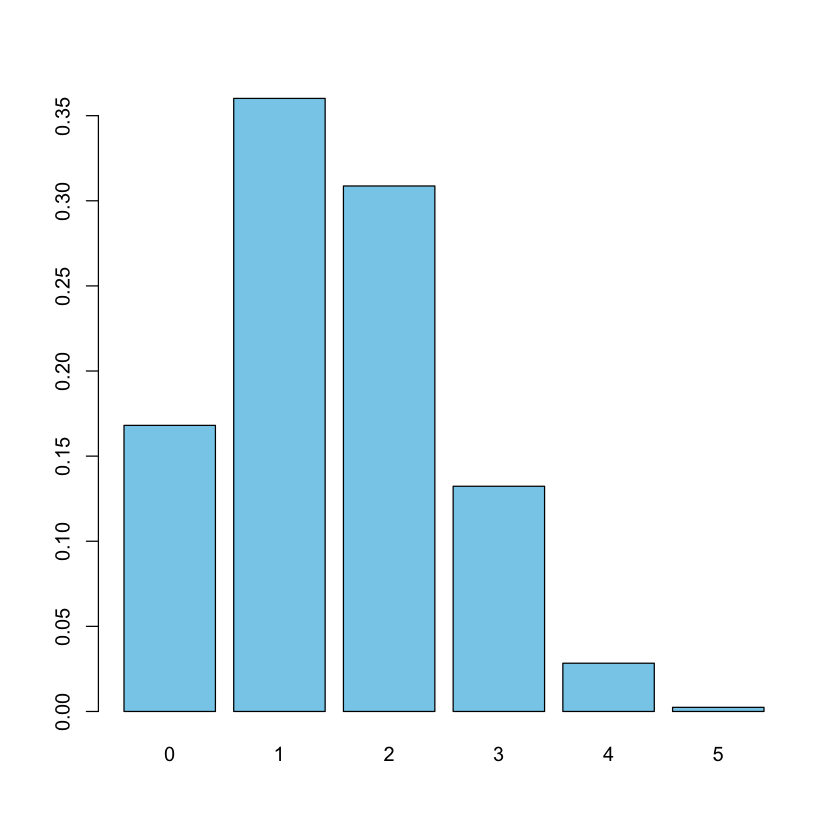

In [9]:
p<-0.3
x<-0:5 # 012345

# 施行を length(x)-1 回を行って、　成功率はp, x回成功する確率
prob<-dbinom(x, length(x)-1, p)

names(prob)<-x # 確率の横軸を設定
barplot(prob,col="skyblue")


---

## sapply関数の例

[こちらを参照](https://www.phd-karaage.com/entry/apply_family_with_R#sapply%E3%81%A8lapply)

In [10]:
data <- iris
# dataの１列目から４列目だけを取り出す

head(data[1:4]) 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [11]:
# 列ごとに平均を求める
print(sapply(data[1:4], mean))

# Sepal.Length 列だけ取り出して、表示する
# print(sapply(data[1:4], mean)['Sepal.Length'])

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333 


---

## 箱ひげ箱(boxplot)の作り方

[参照](https://datasciencehenomiti.com/programing/r/boxplot/)

In [12]:
data <- iris
head(data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


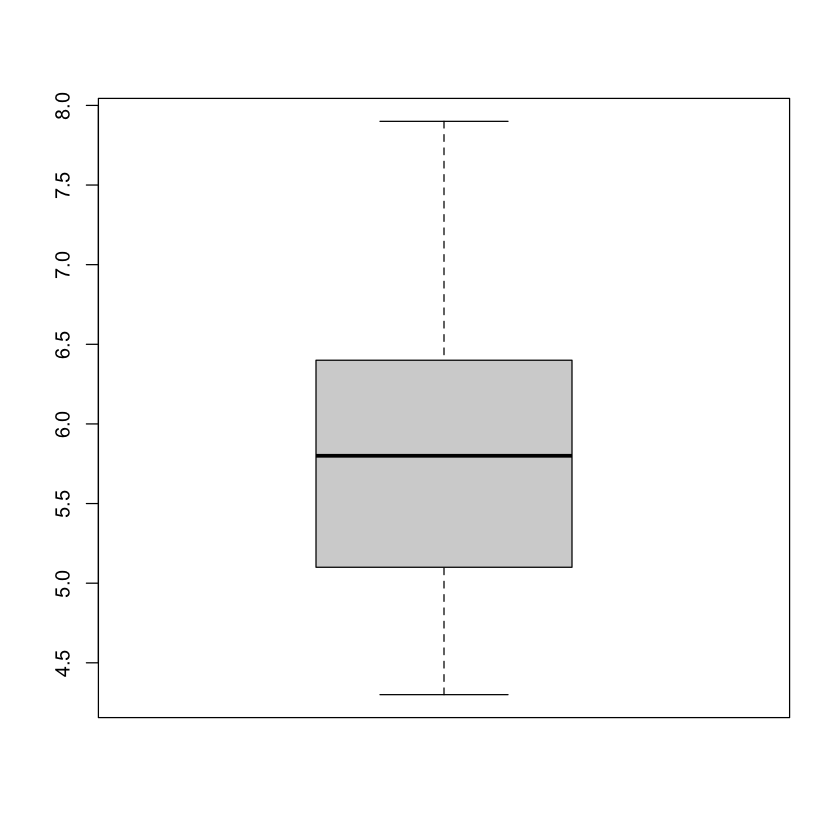

In [13]:
# １列のデータをプロットする
boxplot(x = data$Sepal.Length)


---

## ポアソン分布

ポアソン分布で近似するための目安
1. 試行回数nがやたらと大きい。１万とか、それ以上とか
2. 生起確率pがやたらと小さい。1/1000とか、1/10000とか


ポアソン分布の分布関数

説明の例１：埼玉県平均すると毎年1 ($\lambda$)人の人気芸能人が輩出している。今年2人($x$)ブレイクする確率はどれほどとか

説明の例２：ある工場では、毎月不良品が平均2つ（($\lambda$)）出ている。この工場で不良品が0（$x$）となる確率を求めよ



ポアソン分布の計算式: $ Poi(x|\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}$

ポアソン分布の確率は、Rの `dpois(x = x_vals, lambda = lambda)` で計算できます。

In [107]:
lambda <- 4.5
ceiling(lambda)

[1] 5

In [15]:
x_vals <- seq(from = 0, to = ceiling(lambda) * 3)
x_vals

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

In [44]:
# ポアソン分布の確率は、dpois()で計算できます。確率変数の引数xにx_vals、パラメータの引数lambdaに4.5を指定します。
dpois(x = x_vals, lambda = lambda)

[1] 1.110900e-02 4.999048e-02 1.124786e-01 1.687179e-01 1.898076e-01
 [6] 1.708269e-01 1.281201e-01 8.236295e-02 4.632916e-02 2.316458e-02
[11] 1.042406e-02 4.264389e-03 1.599146e-03 5.535504e-04 1.779269e-04
[16] 5.337808e-05

---

## ポアソン分布を描画 

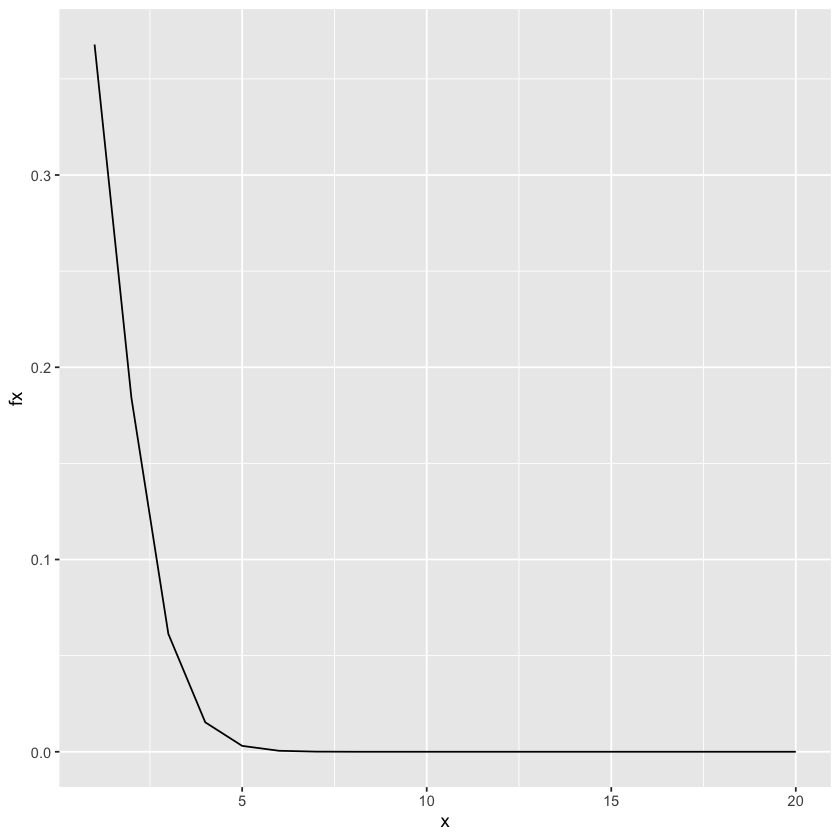

In [121]:
library(ggplot2)
x <- 1:20
# ポアソン分布の確率は、dpois()で計算できます。確率変数の引数xにx_vals、パラメータの引数lambdaは期待値である。
fx <- dpois(x=x, lambda=1)
data <-data.frame(x=x,y=fx)

# 縦軸のyはx回起こった場合の確率
ggplot(data, aes(x=x,y=fx)) + 
    geom_line()

---

## Box Plots with Two Factors

In [17]:
LungCapData <- read.csv("data/LungCap.csv", header=T,sep=",")
head(LungCapData)

names(LungCapData) # 列名を出力

,LungCap,Age,Height,Smoke,Gender,Caesarean
,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
1,6.475,6,62.1,no,male,no
2,10.125,18,74.7,yes,female,no
3,9.550,16,69.7,no,female,yes
4,11.125,14,71.0,no,male,no
5,4.800,5,56.9,no,male,no
6,6.225,11,58.7,no,female,no


[1] "LungCap"   "Age"       "Height"    "Smoke"     "Gender"    "Caesarean"

In [18]:
# The database is attached to the R search path. 
# This means that the database is searched by R when evaluating a variable, 
# so objects in the database can be accessed by simply giving their names.
attach(LungCapData)

The following objects are masked from LungCapData (pos = 3):

    Age, Caesarean, Gender, Height, LungCap, Smoke




喫煙するかしないかだけ見ても、このboxplotはわかりにくい、なぜかというと喫煙の場合LungCapacityのmedian値は大きい。
おそらく喫煙の人は大人が多いので、大人のLungCapacityは大きいから

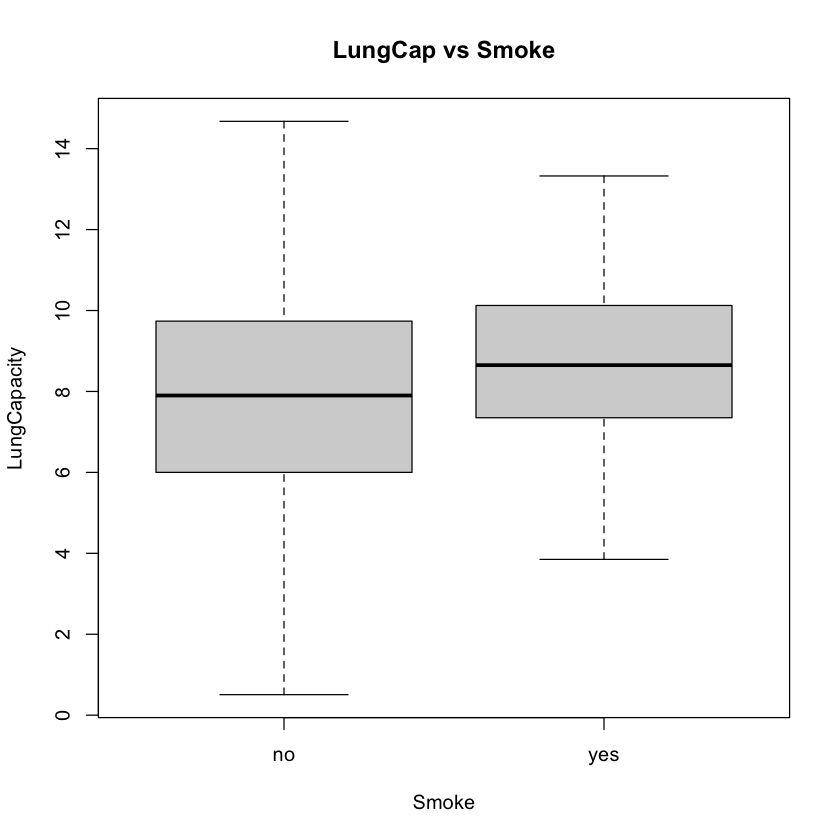

In [19]:
# 縦軸はLungCap列のデータ
# 横軸は喫煙する（yes）かしない(no)かのカテゴリ
boxplot(LungCap~Smoke, ylab="LungCapacity", main="LungCap vs Smoke")

---

## 組み合わせの計算

組み合わせが何パターンあるかは、Rの `choose()` 関数で以下のように求めることができます。 [chooseの参照リンク](https://toukei.link/programmingandsoftware/r/combinationpermutation/)

たとえば： $ {}_4 C_2 $

In [20]:
choose(n=4,k=2)

[1] 6

---

## 多項式の関数の微分

expression関数で数式をセットしておいて、`D` という関数を呼び出す。

In [21]:
func <- expression( x^4 + 2*x^3 + 3*x^2 + 4*x + 5 )
D(func, "x")

4 * x^3 + 2 * (3 * x^2) + 3 * (2 * x) + 4

---

## (WIP)T Test

A `t test` is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.


ビルドインのCO2データセットを利用する

CO2データ設定との説明

Plant : an ordered factor with levels Qn1 < Qn2 < Qn3 < ... < Mc1 giving a unique identifier for each plant.

Type: a factor with levels Quebec Mississippi giving the origin of the plant

Treatment: a factor with levels nonchilled chilled

conc : a numeric vector of ambient carbon dioxide concentrations (mL/L).

uptake: a numeric vector of carbon dioxide uptake rates

In [24]:
head(CO2)

,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
1,Qn1,Quebec,nonchilled,95,16.0
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
6,Qn1,Quebec,nonchilled,675,39.2


---


## ggplot2入門

ggplot2 is included in the tidyverse package.

`
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +  <GEOM_FUNCTION>()
`

In [26]:
install.packages("tidyverse")

also installing the dependencies ‘colorspace’, ‘bit’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘rematch’, ‘bit64’, ‘backports’, ‘generics’, ‘blob’, ‘DBI’, ‘tidyselect’, ‘data.table’, ‘gtable’, ‘isoband’, ‘scales’, ‘gargle’, ‘cellranger’, ‘ids’, ‘timechange’, ‘vroom’, ‘tzdb’, ‘progress’, ‘selectr’, ‘broom’, ‘conflicted’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘forcats’, ‘ggplot2’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘hms’, ‘lubridate’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rvest’, ‘tidyr’





The downloaded binary packages are in
	/var/folders/w2/kvdjj0td38v9dyn6lk80hj7w0000gp/T//RtmpIdZRF2/downloaded_packages


In [33]:
library(tidyverse)

surveys_complete <- read.csv("data/surveys_complete.csv")
head(surveys_complete)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,X,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>
1,1,63,8,19,1977,3,DM,M,35,40
2,2,64,8,19,1977,7,DM,M,37,48
3,3,65,8,19,1977,4,DM,F,34,29
4,4,66,8,19,1977,4,DM,F,35,46
5,5,67,8,19,1977,7,DM,M,35,36
6,6,68,8,19,1977,8,DO,F,32,52


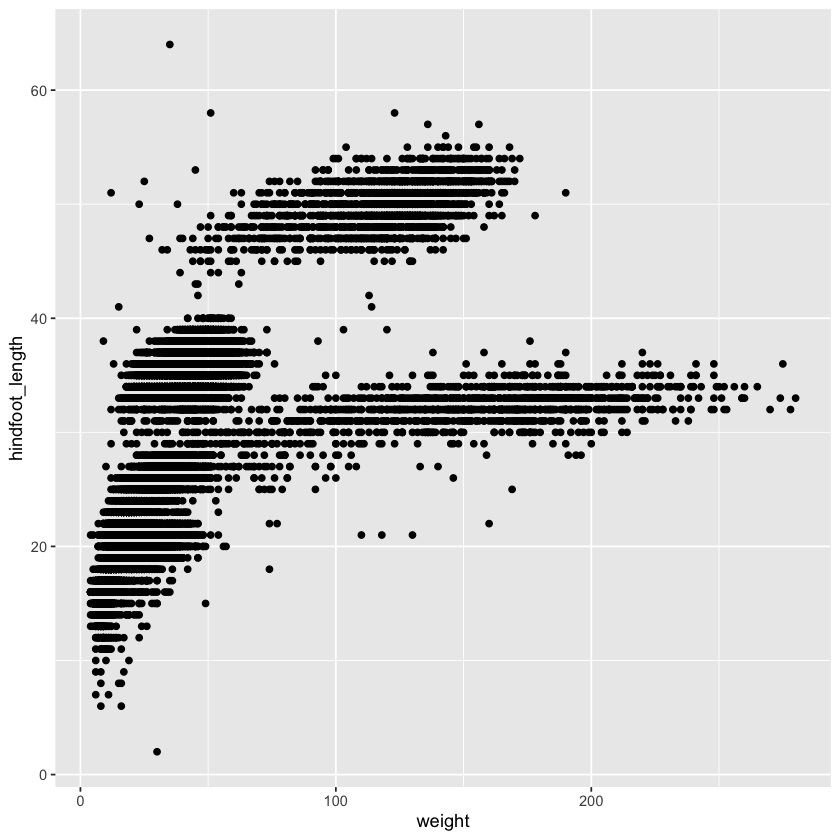

In [58]:
# define an aesthetic mapping (using the aesthetic (aes) function)

# add ‘geoms’ – graphical representations of the data in the plot (points, lines, bars). 
# ggplot2 offers many different geoms; we will use some common ones today, including:
# geom_point() for scatter plots, dot plots, etc.
# geom_boxplot() for, well, boxplots!
# geom_line() for trend lines, time series, etc.


ggplot(data = surveys_complete, mapping = aes(x = weight, y = hindfoot_length)) +
geom_point()


[geom_pointのリファレンス](https://ggplot2.tidyverse.org/reference/geom_point.html)

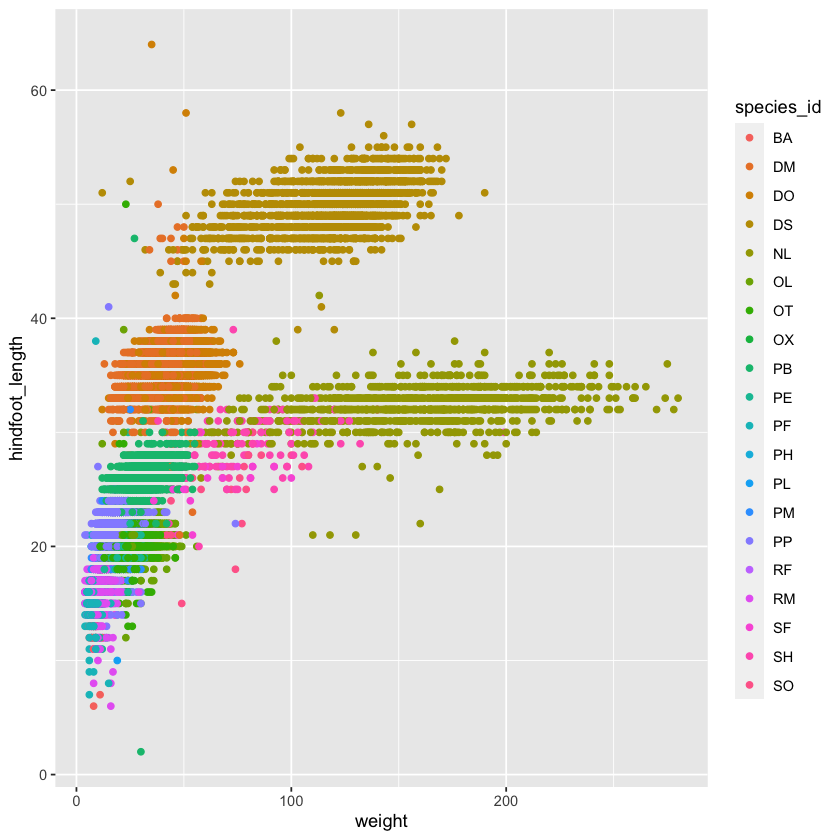

In [59]:
# geom_pointの中でもさらにspecies_idごとに違う色を設定するようにもできる
# alphaは0-1の範囲で設定したら、効果ありそう
ggplot(data = surveys_complete, mapping = aes(x = weight, y = hindfoot_length)) +
    geom_point(alpha = 1, aes(color = species_id))


---

## 積分のやり方


積分は以下の関数で計算

```
integrate(関数, 積分の下端, 積分の上端)
```

引数の`関数`は `function` で定義

以下の積分を求めると

$$\int_{0}^{1}x^2dx$$


下の式を求めることになる

$\lbrack\frac{1}{3}x^3\rbrack_{0}^{1} = \frac{1}{3}*1 - \frac{1}{3}*0 = 0.333333 $


In [79]:
f <- function(x) {x^2} 
integrate(f, 0, 1)

0.3333333 with absolute error < 3.7e-15

---

## 分散の求め方

不偏標本分散を計算する関数は `var()`という関数。

不偏標本分散（unbiased variance）とは？
標本分散が母分散に等しくなるように補正したもの。
標本分散は標本（データ）から計算した分散で、母集団に比べて標本数が少ない時には母分散に比べて小さくなる傾向がある。それを補正したものが「不偏標本分散」。
統計の分野では不偏分散を用いられることが多い。

In [81]:
x <-c(5.23,6.12,5.79)
var(x)

[1] 0.2024333

---

## Rのtibble

data.frameとtibbleの比較

In [89]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [90]:
head(as_tibble(iris))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


新しいtibbleを作成

In [91]:
tibble(
  x = 1:5, 
  y = 1, 
  z = x ^ 2 + y
)

x,y,z
<int>,<dbl>,<dbl>
1,1,2
2,1,5
3,1,10
4,1,17
5,1,26


tribbleを使って、ビジュアル的にわかりやすく設定できる。

In [94]:
df <- tribble(
  ~x, ~y, ~z,
  #--|--|----
  "a", 2, 3.6,
  "b", 1, 8.5
)
df

x,y,z
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5


tibbleのSubsetting

x列あるいはy列を取り出す

In [105]:
df[["x"]]

[1] "a" "b"

In [104]:
df[['y']]*2

[1] 4 2

---

## Rのmutate関数

データセットに新たに変数を追加する関数です。また、既存の変数の書き換えも可能です。dplyrパッケージでも高頻度で利用される基本的な関数の一つです。

In [128]:
data.frame(Seed=0:15) %>% # 種子数を0から15と仮定する
  mutate(Lambda3.5=dpois(Seed, lambda=3.5), # それぞれのλのポワソン分布を発生させる
         Lambda7.7=dpois(Seed, lambda=7.7),
         Lambda15.1=dpois(Seed, lambda=15.1))

Seed,Lambda3.5,Lambda7.7,Lambda15.1
<int>,<dbl>,<dbl>,<dbl>
0,3.019738e-02,0.0004528272,2.767919e-07
1,1.056908e-01,0.0034867693,4.179557e-06
2,1.849590e-01,0.0134240618,3.155566e-05
3,2.157855e-01,0.0344550920,1.588301e-04
4,1.888123e-01,0.0663260522,5.995838e-04
5,1.321686e-01,0.1021421204,1.810743e-03
6,7.709835e-02,0.1310823878,4.557037e-03
7,3.854917e-02,0.1441906266,9.830179e-03
8,1.686526e-02,0.1387834781,1.855446e-02


---

## 正規分布の図を描画

正規分布は英語で normal distribution と良い，Rでの関連コマンドには norm の文字が入る。

統計分布についてのRの関数には，あるxに対する確率密度を求める d... と累積確率を求める p... 

正規分布には，変化し得る要素として平均 mean と標準偏差 sd の二つがある。

これらを特定しなければ，正規分布が定まらない。標準正規分布では mean=0, sd=1 である。


In [134]:
# dnorm( x, mean=m, sd=n ) → 平均ｍ、標準偏差ｎの正規分布確率密度を返す
dnorm(x)

[1] 2.419707e-01 5.399097e-02 4.431848e-03 1.338302e-04 1.486720e-06
 [6] 6.075883e-09 9.134720e-12 5.052271e-15 1.027977e-18 7.694599e-23
[11] 2.118819e-27 2.146384e-32 7.998828e-38 1.096607e-43 5.530710e-50
[16] 1.026163e-56 7.004182e-64 1.758750e-71 1.624636e-79 5.520948e-88

In [174]:
# x軸の値：　−5から5までx軸の値を501個を指定
x_vec = seq(from = -5, to = 5, length.out = 501)
# tibbleのdataframeを作成。
# x軸は x_vec
# y軸はdnormを使って確率密度を計算した値
dens_df <- tibble::tibble(
  x = x_vec, 
  density = dnorm(x=x_vec, mean = 0, sd = 1)
)
head(dens_df)

x,density
<dbl>,<dbl>
-5.00,1.486720e-06
-4.98,1.642751e-06
-4.96,1.814431e-06
-4.94,2.003252e-06
-4.92,2.210839e-06
-4.90,2.438961e-06


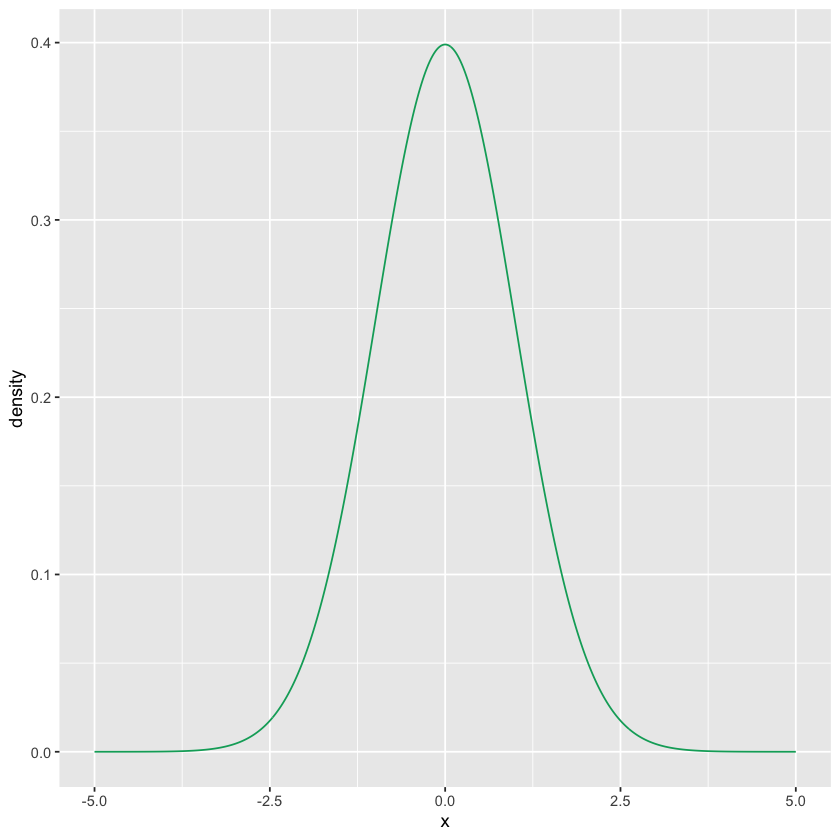

In [175]:
# 正規分布を折れ線グラフで作図
ggplot() + 
  geom_line(data = dens_df, mapping = aes(x = x, y = density), 
            color = "#00A968") # 確率密度

---

## 幾何分布
[幾何分布の説明リンク](https://bellcurve.jp/statistics/course/6988.html)

成功確率$p$がである独立なベルヌーイ試行を繰り返す時、初めて成功するまでの試行回数$X$が従う確率分布を「幾何分布（きかぶんぷ）」といいます。


$$ P(X=k) = {(1-p)^{k-1}}{p}$$


幾何分布をRで導出するにはdgeom関数を使用します。　[関数の説明リンク](http://by-oneself.com/r_for_baseball16/#5)

```
dgeom(x, p)
x:初めて成功するまでに失敗した回数
p: 成功確率
```

In [178]:
# サイコロを投げて、１が出る確率が1/6で、３回目で初めて１が出る確率は下の式で計算できる(0.116になる)
# dgeomの一個目の引数２は成功までの失敗回数！！
dgeom(2, 1/6)

[1] 0.1157407

In [180]:
# 初めて2回目成功、初めて３回目で成功、初めて４回目で成功のリストの計算も下のようにできる
dgeom(1:3, 1/6)

[1] 0.13888889 0.11574074 0.09645062

---

## 幾何分布を描画

x,density
<int>,<dbl>
1,0.13888889
2,0.11574074
3,0.09645062
4,0.08037551
5,0.06697960
6,0.05581633


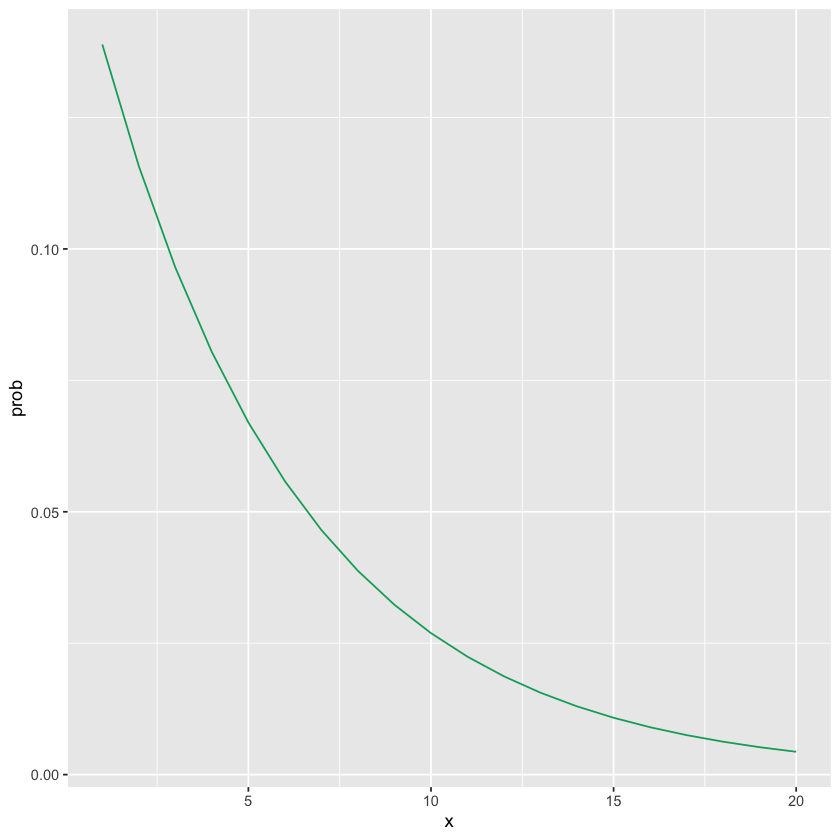

In [184]:
# x軸の値：　−5から5までx軸の値を501個を指定
x_vec = seq(from = 1, to = 20)
# tibbleのdataframeを作成。
# x軸は x_vec
# y軸はdnormを使って確率密度を計算した値
prob_df <- tibble::tibble(
  x = x_vec, 
  prob = dgeom(x_vec, 1/6)
)
head(dens_df)

# 幾何分布のグラフを作成
ggplot() + 
  geom_line(data = prob_df, mapping = aes(x = x, y = prob), 
            color = "#00A968") # 確率密度

---

## Rのパイプライン

パイプライン`%>%` を利用する場合 `install.packages("dplyr")`コマンドでdplyrをインストールする必要がある。

In [24]:
# gapminderというtibble型のデータを用意
#install.packages("gapminder")
library(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [26]:
#install.packages("dplyr")
library(dplyr)
gapminder  %>% 
    # countryとlifeExp列だけを選択
    select(country, lifeExp) %>% 
    
    # countryを２つに絞る
    filter(country == "South Africa" |
           country == "Ireland") %>% 
    
    # countryごとに集計する
    group_by(country) %>%

    # 集計した結果を出す
    summarise(Average_life = mean(lifeExp))

country,Average_life
<fct>,<dbl>
Ireland,73.01725
South Africa,53.99317


---

## 正規分布のZ値 

例えば学生のテストの成績が正規分布に従うとして、平均60点、標準偏差が10
とある学生が80点を取った。この学生の点数のZ値は $(80-60)/10=2$

標準正規分布の $2 \sigma$, 

`pnorm(Z値)` 関数でZ値以下(2以下)の確率を求める

`pnorm(Z値, lower,tail=F)` 関数でZ値以上(2以上)の確率を求める

In [7]:
pnorm(2) # Z値以下(2以下)の確率
pnorm(2,lower.tail=F) # Z値以上(2以上)の確率
# ?pnorm # ヘルプ

[1] 0.9772499

[1] 0.02275013